# K-Means Applied to Child Learning Behavior Dataset

This notebook demonstrates applying K-Means clustering to a real-world dataset.

**For Member 4's code demonstration**

## Overview
This notebook shows:
1. Loading and exploring the dataset
2. Feature selection and preprocessing
3. Finding optimal K using the elbow method
4. Applying K-Means clustering
5. Analyzing and visualizing results


In [1]:
# Import required libraries
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Set style for better visualizations
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 8)


## Step 1: Load and Explore Data

Load the dataset and examine its structure and statistics.


In [2]:
# Find the dataset file (try multiple possible paths)
if os.path.exists('child_learning_behavior.csv'):
    filepath = 'child_learning_behavior.csv'
elif os.path.exists('../child_learning_behavior.csv'):
    filepath = '../child_learning_behavior.csv'
elif os.path.exists('../data/child_learning_behavior.csv'):
    filepath = '../data/child_learning_behavior.csv'
else:
    # Adjust path as needed
    filepath = 'child_learning_behavior.csv'

print(f"Loading dataset from: {filepath}")

# Load the dataset
df = pd.read_csv(filepath)

print("\n" + "=" * 60)
print("DATASET OVERVIEW")
print("=" * 60)
print(f"Shape: {df.shape[0]} rows, {df.shape[1]} columns")
print(f"\nColumn names: {list(df.columns)}")
print(f"\nFirst few rows:")
df.head()


Loading dataset from: ../data/child_learning_behavior.csv

DATASET OVERVIEW
Shape: 300 rows, 8 columns

Column names: ['age', 'daily_screen_time_hours', 'homework_completion_rate', 'attention_score', 'sleep_hours', 'math_score', 'reading_score', 'parental_involvement_level']

First few rows:


,age,daily_screen_time_hours,homework_completion_rate,attention_score,sleep_hours,math_score,reading_score,parental_involvement_level
0,12,2.27,76.49,57,7.36,76,60,2
1,9,5.17,78.20,70,8.38,92,56,5
2,13,1.25,73.29,82,6.22,98,61,4
3,10,4.40,45.46,23,10.26,44,87,5
4,12,3.54,83.58,20,6.18,72,76,3


In [3]:
# Dataset statistics
print("Dataset statistics:")
df.describe()


Dataset statistics:


,age,daily_screen_time_hours,homework_completion_rate,attention_score,sleep_hours,math_score,reading_score,parental_involvement_level
count,300.00000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000
mean,9.92000,3.216000,70.180767,57.286667,8.501067,69.146667,66.856667,3.113333
std,2.64896,1.602407,16.338698,22.285870,1.446798,17.100680,17.157039,1.440163
min,6.00000,0.530000,40.160000,20.000000,6.010000,40.000000,40.000000,1.000000
25%,8.00000,1.880000,57.820000,37.000000,7.220000,54.000000,52.750000,2.000000
50%,10.00000,3.145000,71.835000,57.000000,8.575000,68.500000,66.500000,3.000000
75%,12.00000,4.572500,83.572500,76.000000,9.735000,85.000000,80.000000,4.000000
max,14.00000,5.980000,99.860000,99.000000,10.960000,99.000000,99.000000,5.000000


## Step 2: Prepare Features

Select relevant numerical features and normalize them for clustering.


In [4]:
# Select numerical features relevant for clustering learning patterns
features = [
    'daily_screen_time_hours',
    'homework_completion_rate',
    'attention_score',
    'sleep_hours',
    'math_score',
    'reading_score'
]

# Extract feature data
X = df[features].values
feature_names = features

print("Features selected:", features)
print(f"Feature shape: {X.shape}")


Features selected: ['daily_screen_time_hours', 'homework_completion_rate', 'attention_score', 'sleep_hours', 'math_score', 'reading_score']
Feature shape: (300, 6)


In [5]:
# Normalize features (critical for K-Means)
# Features are on different scales, so normalization ensures equal contribution
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print("\n" + "=" * 60)
print("FEATURE PREPARATION")
print("=" * 60)
print("Features normalized using StandardScaler (mean=0, std=1)")
print(f"\nNormalized feature statistics:")
pd.DataFrame(X_scaled, columns=features).describe()



FEATURE PREPARATION
Features normalized using StandardScaler (mean=0, std=1)

Normalized feature statistics:


,daily_screen_time_hours,homework_completion_rate,attention_score,sleep_hours,math_score,reading_score
count,3.000000e+02,3.000000e+02,3.000000e+02,3.000000e+02,3.000000e+02,3.000000e+02
mean,1.539509e-16,-2.516506e-16,-8.881784e-17,8.585725e-17,3.108624e-16,-1.657933e-16
std,1.001671e+00,1.001671e+00,1.001671e+00,1.001671e+00,1.001671e+00,1.001671e+00
min,-1.679029e+00,-1.840473e+00,-1.675903e+00,-1.724656e+00,-1.707263e+00,-1.567959e+00
25%,-8.351390e-01,-7.577972e-01,-9.118137e-01,-8.869292e-01,-8.872147e-01,-8.235825e-01
50%,-4.438239e-02,1.014155e-01,-1.288465e-02,5.118674e-02,-3.787844e-02,-2.082309e-02
75%,8.479536e-01,8.210023e-01,8.410980e-01,8.542971e-01,9.286076e-01,7.673407e-01
max,1.727788e+00,1.819534e+00,1.874866e+00,1.702409e+00,1.748656e+00,1.876608e+00


## Step 3: Find Optimal K (Elbow Method)

Use the elbow method to determine the optimal number of clusters.


In [6]:
# Use Elbow Method to find optimal number of clusters
wcss_scores = []
k_range = range(2, 7)  # Test K values from 2 to 6

print("\n" + "=" * 60)
print("FINDING OPTIMAL K (Elbow Method)")
print("=" * 60)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    wcss = kmeans.inertia_  # Within-cluster sum of squares
    wcss_scores.append(wcss)
    print(f"K = {k}: WCSS = {wcss:.2f}")



FINDING OPTIMAL K (Elbow Method)
K = 2: WCSS = 1548.24
K = 3: WCSS = 1381.08
K = 4: WCSS = 1243.96
K = 5: WCSS = 1153.61
K = 6: WCSS = 1066.36


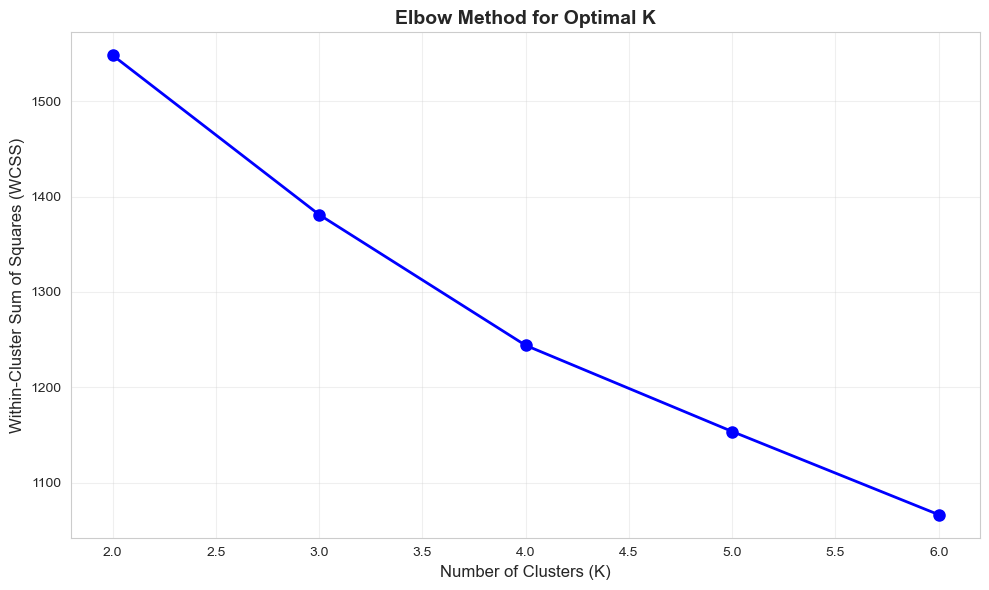


Elbow plot saved as 'elbow_method.png'

Suggested K: 3


<Figure size 1200x800 with 0 Axes>

In [7]:
# Plot elbow curve
plt.figure(figsize=(10, 6))
plt.plot(k_range, wcss_scores, 'bo-', linewidth=2, markersize=8)
plt.xlabel('Number of Clusters (K)', fontsize=12)
plt.ylabel('Within-Cluster Sum of Squares (WCSS)', fontsize=12)
plt.title('Elbow Method for Optimal K', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Save plot
plt.savefig('elbow_method.png', dpi=150)
print("\nElbow plot saved as 'elbow_method.png'")

# Choose optimal K (look for the "elbow" in the curve)
optimal_k = 3  # Can be adjusted based on elbow plot
print(f"\nSuggested K: {optimal_k}")
print("=" * 60)


## Step 4: Apply K-Means Clustering

Apply K-Means with the chosen number of clusters.


In [8]:
# Apply K-Means clustering
k = optimal_k  # Can be changed to 3 or 4 based on requirements

print("\n" + "=" * 60)
print(f"APPLYING K-MEANS (K = {k})")
print("=" * 60)

# Create and fit K-Means model
kmeans_model = KMeans(n_clusters=k, random_state=42, n_init=10)
labels = kmeans_model.fit_predict(X_scaled)

# Print cluster sizes
unique, counts = np.unique(labels, return_counts=True)
print("\nCluster sizes:")
for cluster_id, count in zip(unique, counts):
    print(f"  Cluster {cluster_id}: {count} students ({count/len(labels)*100:.1f}%)")

print(f"\nInertia (WCSS): {kmeans_model.inertia_:.2f}")
print("=" * 60)



APPLYING K-MEANS (K = 3)

Cluster sizes:
  Cluster 0: 87 students (29.0%)
  Cluster 1: 114 students (38.0%)
  Cluster 2: 99 students (33.0%)

Inertia (WCSS): 1381.08


## Step 5: Analyze Cluster Characteristics

Examine the characteristics of each cluster.


In [9]:
# Add cluster labels to dataframe
df_clustered = df.copy()
df_clustered['cluster'] = labels

# Calculate mean values for each cluster
cluster_stats = df_clustered.groupby('cluster')[feature_names + ['age']].mean()

print("\n" + "=" * 60)
print("CLUSTER CHARACTERISTICS")
print("=" * 60)
print("\nAverage values by cluster:")
cluster_stats.round(2)



CLUSTER CHARACTERISTICS

Average values by cluster:


,daily_screen_time_hours,homework_completion_rate,attention_score,sleep_hours,math_score,reading_score,age
cluster,,,,,,,
0,1.97,80.75,64.59,8.41,69.36,53.39,10.46
1,3.16,55.28,54.46,9.22,66.21,69.12,9.88
2,4.37,78.05,54.12,7.75,72.34,76.08,9.49


## Step 6: Visualize Results

Create visualizations to understand the clustering results.


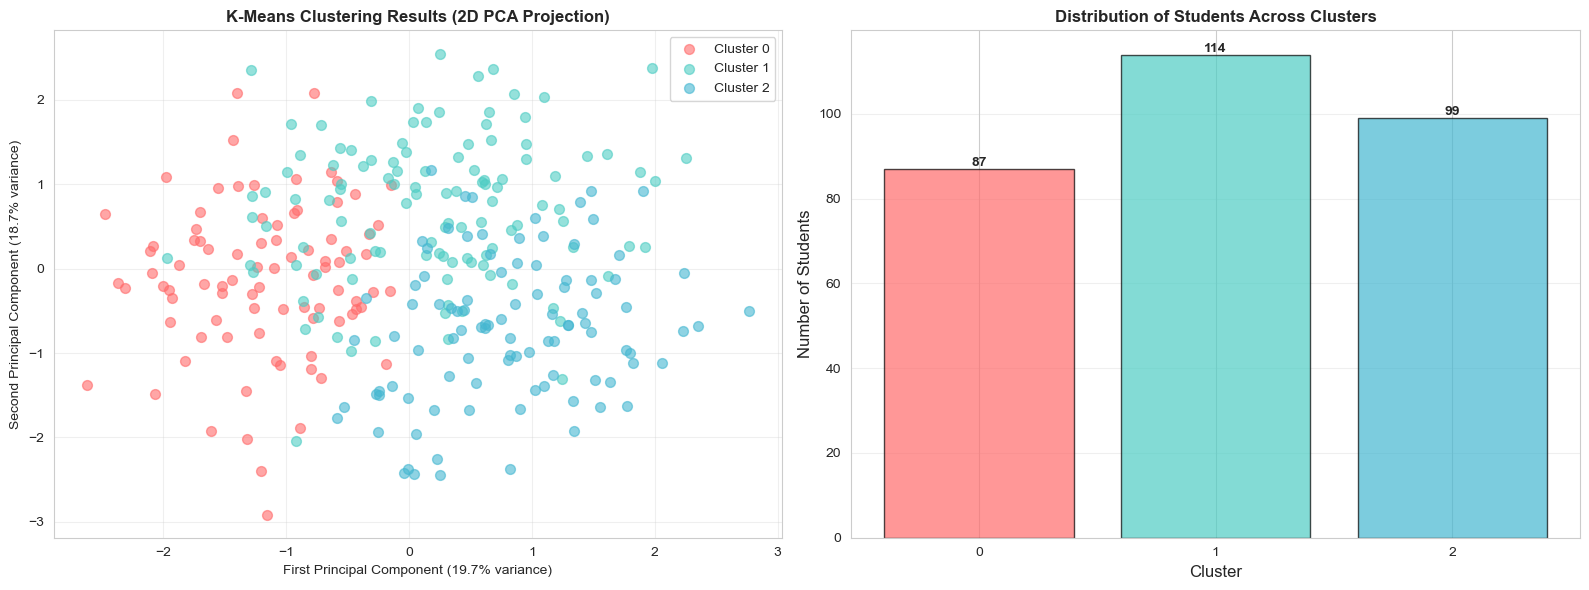


Visualization saved as 'kmeans_results.png'


<Figure size 1200x800 with 0 Axes>

In [10]:
# Use PCA to reduce to 2D for visualization
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_scaled)

# Create figure with subplots
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Plot 1: 2D PCA visualization
colors = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#FFA07A', '#98D8C8']
ax1 = axes[0]

for i in range(k):
    cluster_points = X_pca[labels == i]
    ax1.scatter(cluster_points[:, 0], cluster_points[:, 1],
               c=colors[i], label=f'Cluster {i}', alpha=0.6, s=50)

ax1.set_xlabel(f'First Principal Component ({pca.explained_variance_ratio_[0]*100:.1f}% variance)')
ax1.set_ylabel(f'Second Principal Component ({pca.explained_variance_ratio_[1]*100:.1f}% variance)')
ax1.set_title('K-Means Clustering Results (2D PCA Projection)', fontweight='bold')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Plot 2: Cluster distribution
ax2 = axes[1]
cluster_counts = pd.Series(labels).value_counts().sort_index()
bars = ax2.bar(cluster_counts.index.astype(str), cluster_counts.values,
               color=colors[:k], alpha=0.7, edgecolor='black')
ax2.set_xlabel('Cluster', fontsize=12)
ax2.set_ylabel('Number of Students', fontsize=12)
ax2.set_title('Distribution of Students Across Clusters', fontweight='bold')
ax2.grid(True, alpha=0.3, axis='y')

# Add value labels on bars
for bar in bars:
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2., height,
            f'{int(height)}', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

# Save visualization
plt.savefig('kmeans_results.png', dpi=150)
print("\nVisualization saved as 'kmeans_results.png'")


## Save Results

Save the clustered dataset for further analysis.


In [11]:
# Save results
df_clustered.to_csv('child_learning_behavior_clustered.csv', index=False)
print("Clustered dataset saved as 'child_learning_behavior_clustered.csv'")

print("\n" + "=" * 60)
print("ANALYSIS COMPLETE")
print("=" * 60)


Clustered dataset saved as 'child_learning_behavior_clustered.csv'

ANALYSIS COMPLETE
